### Comparison of the normalization calculations

In [1]:
import numpy as np
import tqdm
from cmblensplus import basic, flatsky
import cmb
import binning as bins
from matplotlib.pyplot import *
from scipy.interpolate import InterpolatedUnivariateSpline as spline

In [2]:
# parameters
Tcmb = 2.72e6
lmax = 2000
rlmax = lmax - 1
rL = [75,rlmax]
oL = [75,rlmax]
l  = np.linspace(0,rlmax,rlmax+1)
nx, ny = 512, 512
D  = np.array([nx,ny]) / 60.*np.pi/180.
#nx, ny = 1024, 1024
#D  = np.array([50.,50.]) * np.pi/180. #np.array([nx,ny]) / 60.*np.pi/180.
qlist = ['TT']
method = 'step'

In [3]:
# binned multipoles
mb = bins.multipole_binning(100,lmin=oL[0],lmax=oL[1])

In [4]:
# multipoles on grids
lx, ly, el, il = flatsky.utils.elarrays(nx,ny,D)
kl = el*(el+1.)/2.

In [5]:
# load unlensed and lensed Cls
lcl = cmb.read_camb_cls('../data/lensedcls.dat',ftype='lens',output='array')[:,:lmax+1]
itt     = np.zeros(lmax+1)
#iee     = np.zeros(lmax+1)
#ibb     = np.zeros(lmax+1)
#ntt = np.ones(lmax+1)*(400.*np.pi/10800/Tcmb)**2
#itt[2:] = 1./(lcl[0,2:]+ntt[2:])
itt[2:] = 1./lcl[0,2:]
#iee[2:] = 1./lcl[1,2:]
#ibb[2:] = 1./lcl[2,2:]

In [6]:
#loglog(lcl[0])
#loglog(ntt)

In [7]:
# assign 1d cl on 2d grid
cltt = flatsky.utils.cl2c2d(nx,ny,D,2,lmax,lcl[0,:])
#clee = flatsky.utils.cl2c2d(nx,ny,D,2,lmax,lcl[1,:])
#clte = flatsky.utils.cl2c2d(nx,ny,D,2,lmax,lcl[3,:])
iltt = flatsky.utils.cl2c2d(nx,ny,D,2,lmax,itt)
#ilee = flatsky.utils.cl2c2d(nx,ny,D,2,lmax,iee)
#ilbb = flatsky.utils.cl2c2d(nx,ny,D,2,lmax,ibb)

In [8]:
# compute analytic normalization with 2d filtering on 2D
Ag, Ac = {}, {}
Ag['TT'], Ac['TT'] = flatsky.norm_lens.qtt(nx,ny,D,rL,iltt,cltt,oL)

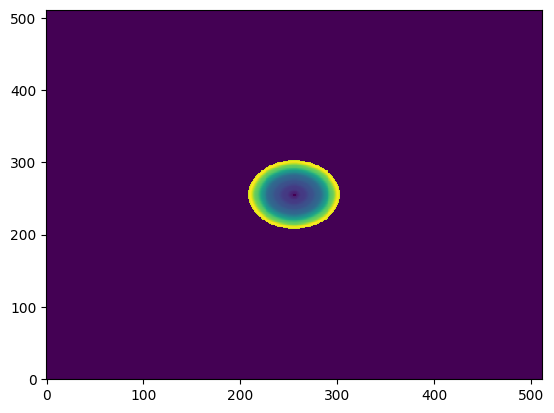

In [9]:
x = np.linspace(0,nx-1,nx)
pcolor(x,x,kl**2*Ag['TT'])

In [10]:
#ag, ac = basic.flat.alxy('TT','lensing',oL[1],rL[0],rL[1]-1,lcl[0,:rL[1]],itt[:rL[1]],itt[:rL[1]],gln=200)
ag, ac = basic.flat.alxy('TT','lensing',oL[1],rL[0],rL[1],lcl[0,:rL[1]+1],itt[:rL[1]+1],itt[:rL[1]+1],gln=200)

In [11]:
ag2d = flatsky.utils.cl2c2d(nx,ny,D,oL[0],oL[1],ag)

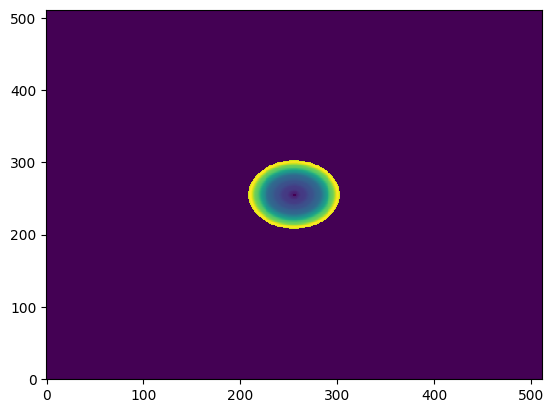

In [12]:
x = np.linspace(0,nx-1,nx)
pcolor(x,x,kl**2*ag2d)

/tmp/ipykernel_938835/1189398736.py:2: RuntimeWarning: divide by zero encountered in divide
  pcolor(x,x,ag2d/Ag['TT']-1,vmin=-0.01,vmax=0.01)
/tmp/ipykernel_938835/1189398736.py:2: RuntimeWarning: invalid value encountered in divide
  pcolor(x,x,ag2d/Ag['TT']-1,vmin=-0.01,vmax=0.01)


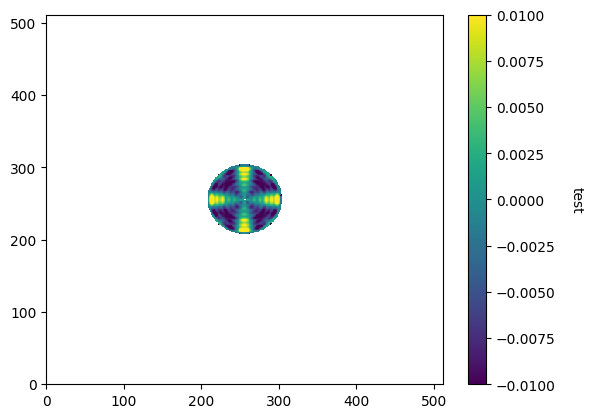

In [13]:
x = np.linspace(0,nx-1,nx)
pcolor(x,x,ag2d/Ag['TT']-1,vmin=-0.01,vmax=0.01)
cb = colorbar()
cb.set_label('test',labelpad=20,rotation=270)

In [14]:
ratio = flatsky.utils.c2d2bcl(nx,ny,D,ag2d/Ag['TT'],100,oL)

/tmp/ipykernel_938835/2594858015.py:1: RuntimeWarning: divide by zero encountered in divide
  ratio = flatsky.utils.c2d2bcl(nx,ny,D,ag2d/Ag['TT'],100,oL)
/tmp/ipykernel_938835/2594858015.py:1: RuntimeWarning: invalid value encountered in divide
  ratio = flatsky.utils.c2d2bcl(nx,ny,D,ag2d/Ag['TT'],100,oL)


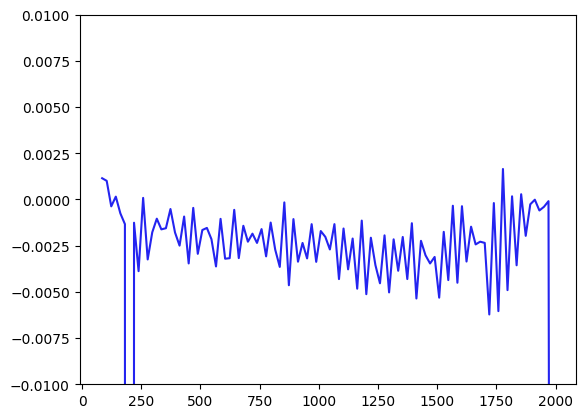

In [15]:
ylim(-0.01,0.01)
plot(mb.bc,ratio-1)